In [1]:
import cv2
import numpy as np
import os, glob, random
import matplotlib.pyplot as plt

In [2]:
base_path = "D:/vision_final_data/x_ray_images/Astrophysics/"
categories = ['Electronic cigarettes', 'Gun', 'Liquid', 'SmartPhone']
dict_file = "single_default_x_ray_dict.npy"
svm_model_file = "single_default_x_ray_svm.xml"

In [3]:
detector = cv2.xfeatures2d.SIFT_create()
bowExtractor = cv2.BOWImgDescriptorExtractor(detector, cv2.BFMatcher(cv2.NORM_L2))
bowExtractor.setVocabulary(np.load(dict_file))
svm = cv2.ml.SVM_load(svm_model_file)

In [4]:
labels = []
results = []

electronic_cigarettes_test_set = []
gun_test_set = []
liquid_test_set = []
smartphone_test_set = []

for label, category in enumerate(categories):
    dir_path = base_path + category + '/Single_Other/'
    for i in range(100):
        img_path = random.choice(glob.glob(dir_path+'/*.*'))
        if category == 'Electronic cigarettes':
            electronic_cigarettes_test_set.append(img_path)
        elif category == 'Gun':
            gun_test_set.append(img_path)
        elif category == 'Liquid':
            liquid_test_set.append(img_path)
        elif category == 'SmartPhone':
            smartphone_test_set.append(img_path)

test_set = [electronic_cigarettes_test_set, gun_test_set, liquid_test_set, smartphone_test_set]

In [5]:
wrong_predict = []

for label, categorical_test_set in enumerate(test_set):
    labels = []
    results = []
    for img_path in categorical_test_set:
        labels.append(label)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hist = bowExtractor.compute(gray, detector.detect(gray))
        ret, result = svm.predict(hist)
        resp = result[0][0]
        results.append(resp)
    labels = np.array(labels)
    results = np.array(results)
    err = (labels != results)
    idx = 0
    for i in err:
        if i:
            wrong_predict.append([idx, categories[label], categories[int(results[idx])]])
        idx += 1
    err_mean = err.mean()
    print("{0} : {1}".format(categories[label], (1-err_mean)*100))

Electronic cigarettes : 60.0
Gun : 100.0
Liquid : 79.0
SmartPhone : 97.0


In [6]:
print("index / right label / predict label")
for i in range(len(wrong_predict)):
    print(wrong_predict[i])

index / right label / predict label
[2, 'Electronic cigarettes', 'Gun']
[3, 'Electronic cigarettes', 'Gun']
[5, 'Electronic cigarettes', 'Gun']
[8, 'Electronic cigarettes', 'Gun']
[9, 'Electronic cigarettes', 'Gun']
[11, 'Electronic cigarettes', 'Gun']
[12, 'Electronic cigarettes', 'Gun']
[16, 'Electronic cigarettes', 'Gun']
[17, 'Electronic cigarettes', 'Gun']
[19, 'Electronic cigarettes', 'Gun']
[25, 'Electronic cigarettes', 'Gun']
[28, 'Electronic cigarettes', 'Gun']
[29, 'Electronic cigarettes', 'Gun']
[33, 'Electronic cigarettes', 'Gun']
[37, 'Electronic cigarettes', 'Gun']
[38, 'Electronic cigarettes', 'Gun']
[39, 'Electronic cigarettes', 'Gun']
[42, 'Electronic cigarettes', 'Gun']
[44, 'Electronic cigarettes', 'Gun']
[46, 'Electronic cigarettes', 'Gun']
[47, 'Electronic cigarettes', 'Gun']
[58, 'Electronic cigarettes', 'Gun']
[59, 'Electronic cigarettes', 'Gun']
[60, 'Electronic cigarettes', 'Gun']
[64, 'Electronic cigarettes', 'Gun']
[68, 'Electronic cigarettes', 'Gun']
[69, 'E

### histogram

### electronic_cigarettes

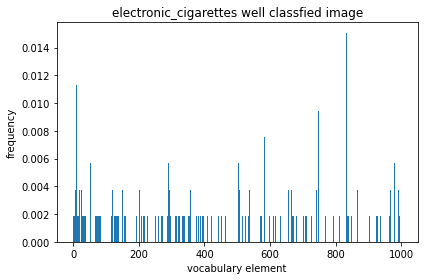

In [16]:
EC_o_img = cv2.imread(electronic_cigarettes_test_set[0], cv2.IMREAD_GRAYSCALE)
kps = detector.detect(EC_o_img, None)
descr = bowExtractor.compute(EC_o_img, kps)

plt.figure()
plt.title("electronic_cigarettes well classfied image")
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

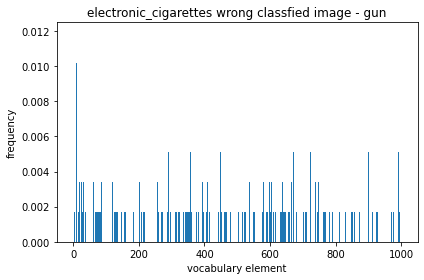

In [17]:
# [2, 'Electronic cigarettes', 'Gun']
EC_x_img_gun = cv2.imread(electronic_cigarettes_test_set[2], cv2.IMREAD_GRAYSCALE)
kps = detector.detect(EC_x_img_gun, None)
descr = bowExtractor.compute(EC_x_img_gun, kps)

plt.figure()
plt.title("electronic_cigarettes wrong classfied image - gun")
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

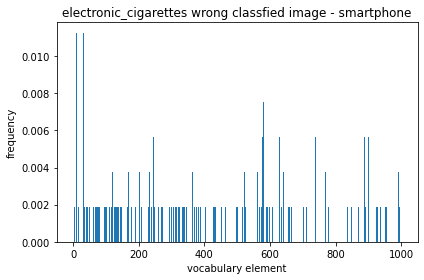

In [22]:
# [70, 'Electronic cigarettes', 'SmartPhone']
EC_x_img_smartphone = cv2.imread(electronic_cigarettes_test_set[70], cv2.IMREAD_GRAYSCALE)
kps = detector.detect(EC_x_img_smartphone, None)
descr = bowExtractor.compute(EC_x_img_smartphone, kps)

plt.figure()
plt.title("electronic_cigarettes wrong classfied image - smartphone")
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

### liquid

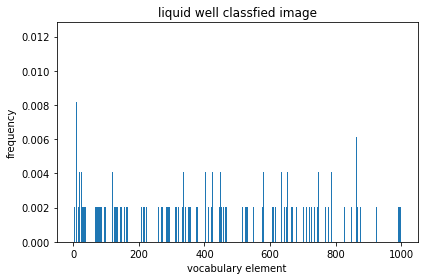

In [9]:
liguid_o_img = cv2.imread(liquid_test_set[8], cv2.IMREAD_GRAYSCALE)
kps = detector.detect(liguid_o_img, None)
descr = bowExtractor.compute(liguid_o_img, kps)

plt.figure()
plt.title("liquid well classfied image")
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

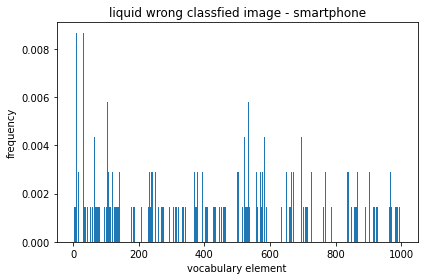

In [24]:
# [1, 'Liquid', 'SmartPhone']
liquid_x_img_smartphone = cv2.imread(liquid_test_set[1], cv2.IMREAD_GRAYSCALE)
kps = detector.detect(liquid_x_img_smartphone, None)
descr = bowExtractor.compute(liquid_x_img_smartphone, kps)

plt.figure()
plt.title("liquid wrong classfied image - smartphone")
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

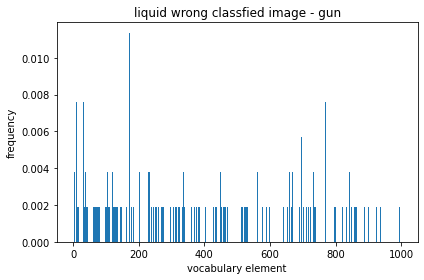

In [25]:
# [18, 'Liquid', 'Gun']
liquid_x_img_gun = cv2.imread(liquid_test_set[18], cv2.IMREAD_GRAYSCALE)
kps = detector.detect(liquid_x_img_gun, None)
descr = bowExtractor.compute(liquid_x_img_gun, kps)

plt.figure()
plt.title("liquid wrong classfied image - gun")
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

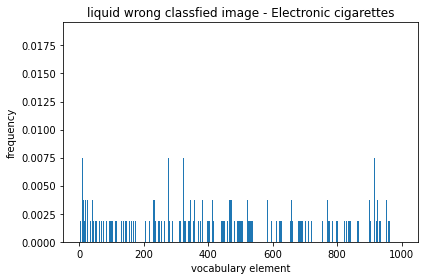

In [26]:
# [22, 'Liquid', 'Electronic cigarettes']
liquid_x_img_ec = cv2.imread(liquid_test_set[22], cv2.IMREAD_GRAYSCALE)
kps = detector.detect(liquid_x_img_ec, None)
descr = bowExtractor.compute(liquid_x_img_ec, kps)

plt.figure()
plt.title("liquid wrong classfied image - Electronic cigarettes")
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

### smartphone

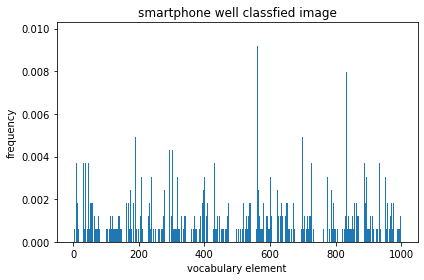

In [13]:
smartphone_o_img = cv2.imread(smartphone_test_set[10], cv2.IMREAD_GRAYSCALE)
kps = detector.detect(smartphone_o_img, None)
descr = bowExtractor.compute(smartphone_o_img, kps)

plt.figure()
plt.title("smartphone well classfied image")
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

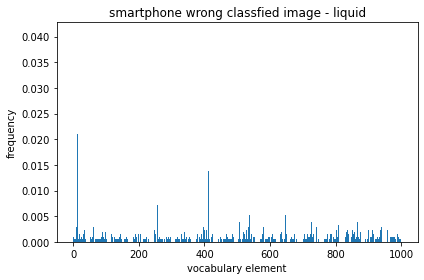

In [14]:
# [4, 'SmartPhone', 'Liquid']
smartphone_x_img_liquid = cv2.imread(smartphone_test_set[4], cv2.IMREAD_GRAYSCALE)
kps = detector.detect(smartphone_x_img_liquid, None)
descr = bowExtractor.compute(smartphone_x_img_liquid, kps)

plt.figure()
plt.title("smartphone wrong classfied image - liquid")
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

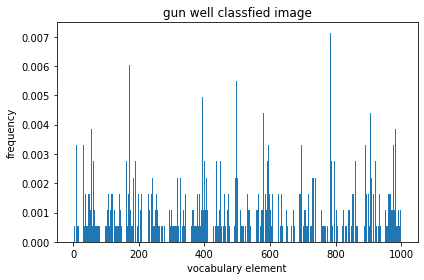

In [23]:
gun_o_img = cv2.imread(gun_test_set[10], cv2.IMREAD_GRAYSCALE)
kps = detector.detect(gun_o_img, None)
descr = bowExtractor.compute(gun_o_img, kps)

plt.figure()
plt.title("gun well classfied image")
plt.bar(np.arange(len(descr[0])), descr[0])
plt.xlabel('vocabulary element')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()